# Preliminaries

In [1]:
# data import, feature generation, EDA
import pandas as pd

In [56]:
# import data
df_train = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/train.csv')
kaggle_toxic_tr = train.copy()

df_test = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test.csv')
df_test_labels = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test_labels.csv')
df_test = pd.merge(test, test_labels)
kaggle_toxic_te = test.copy()

Classes are imbalanced 10:1. Downsample the majority class.

In [57]:
df_train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [59]:
# downsample the majority class
count_minor = df_train['toxic'].value_counts().min()
class_minor = df_train[train['toxic'] == 1]
class_major = df_train[train['toxic'] == 0].sample(n=count_minor, random_state=936) 

df_train_bal = pd.concat([class_minor, class_major]).sort_index()

In [5]:
# train test split
from sklearn.model_selection import train_test_split

In [60]:
# train/test split the data
X = df_train_bal['comment_text']
y = df_train_bal['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1115)

# Feature Engineering

In [195]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# import numpy as np
# import re
# from string import punctuation

# eng_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [243]:
# X_trains['toxic'] = pd.DataFrame(X_trains['toxic'])

In [245]:
# X_trains['toxic']['count_char'] = X_trains['toxic']['comment_text'].str.len()

In [ ]:
# train['count_punctuation'] = train["comment_text"].apply(lambda x: len([c for c in str(x) if c in punctuation]))

In [127]:
# train['count_word'] = train["comment_text"].apply(lambda x: len(str(x).split()))

# train['punct_percent'] = train['count_punctuation'] / train['count_word']

# train['count_real_word'] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isalpha()]))
# train['count_unique_word'] = train["comment_text"].apply(lambda x: len(set(str(x).split())))
# train["count_stopwords"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
# train["count_words_title"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
# train["count_words_upper"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# train["mean_word_len"] = train["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# train['word_unique_percent'] = train['count_unique_word'] / train['count_word']

# train['count_sent'] = train["comment_text"].apply(lambda x: len(re.findall('\n', str(x)))+1)

# Exploratory Data Analysis

There are 159,571 comments that range from 6 characters up to 5000 characters long.

Toxic comments tend to be very short or very long relative to nontoxic comments.

In [5]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

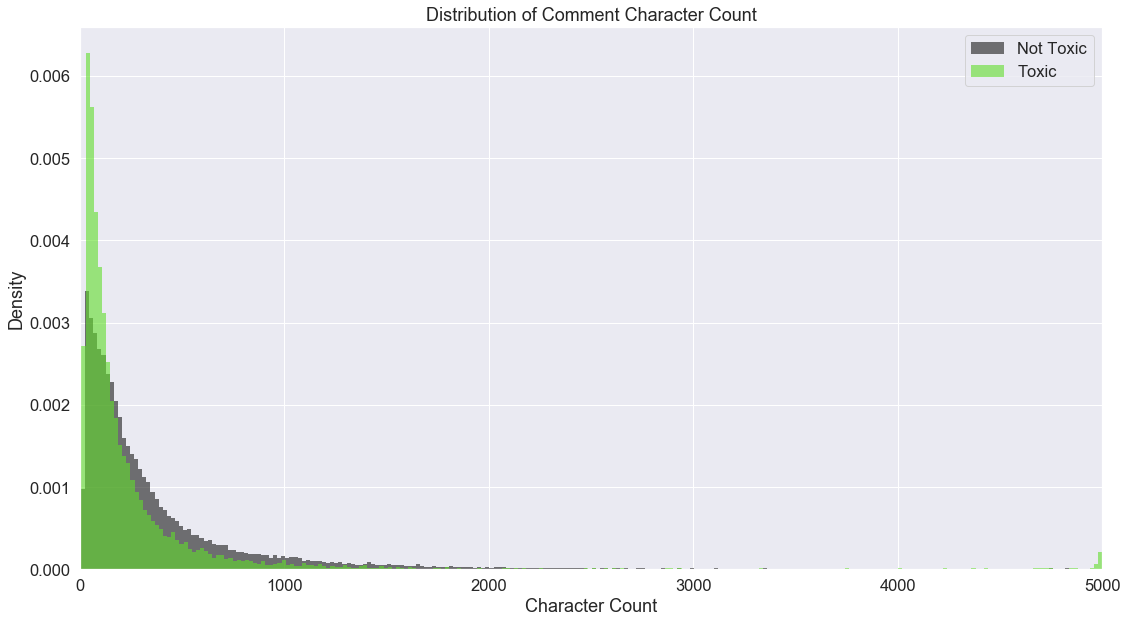

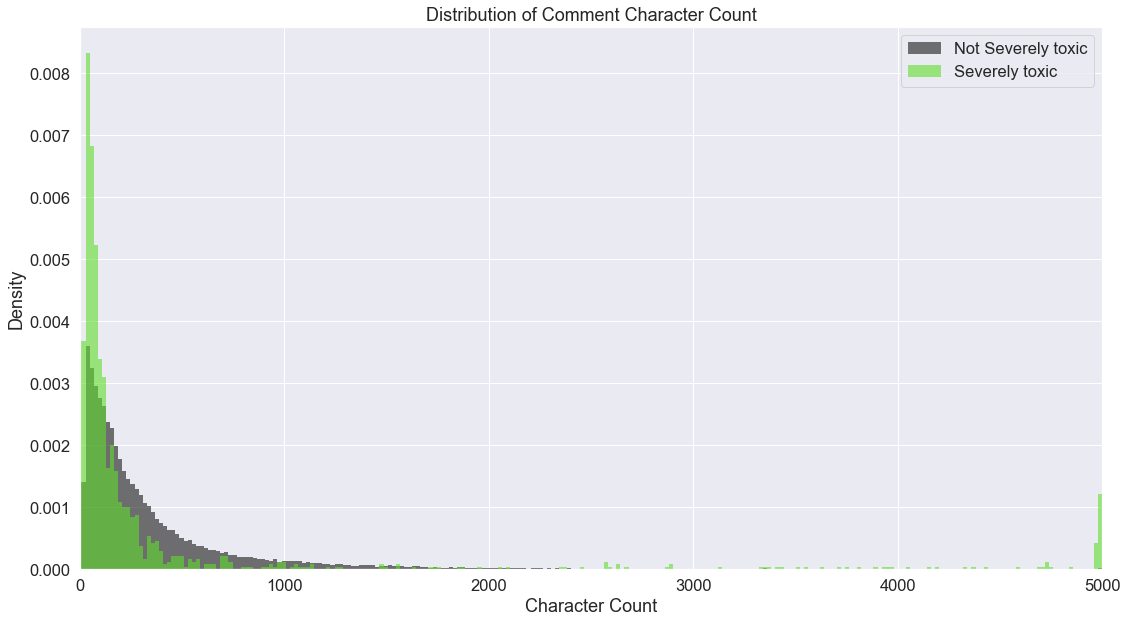

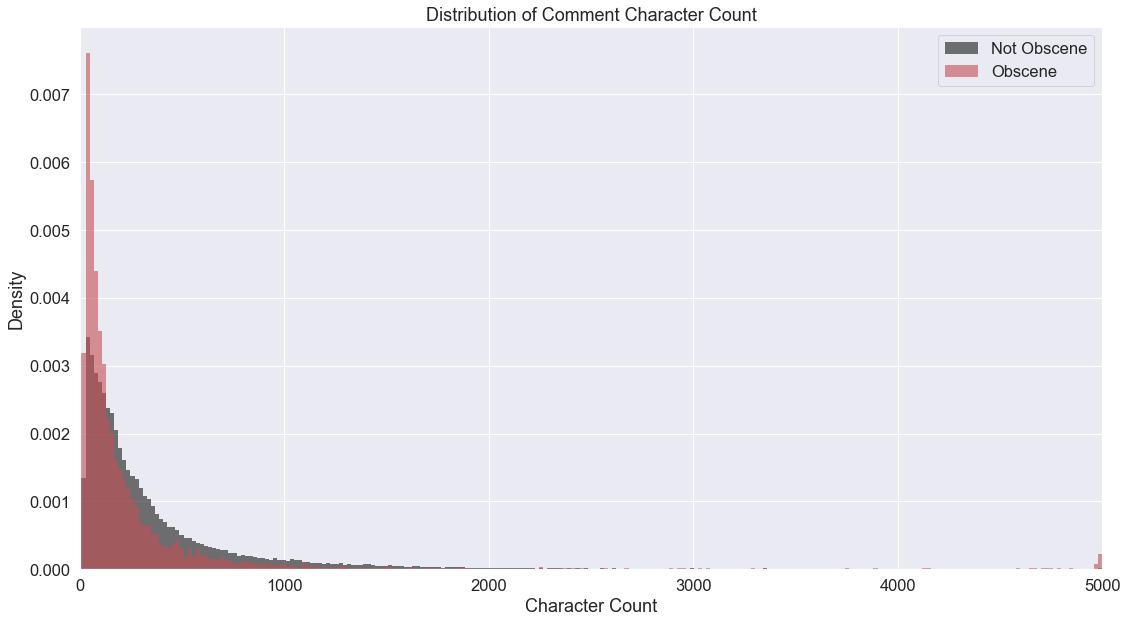

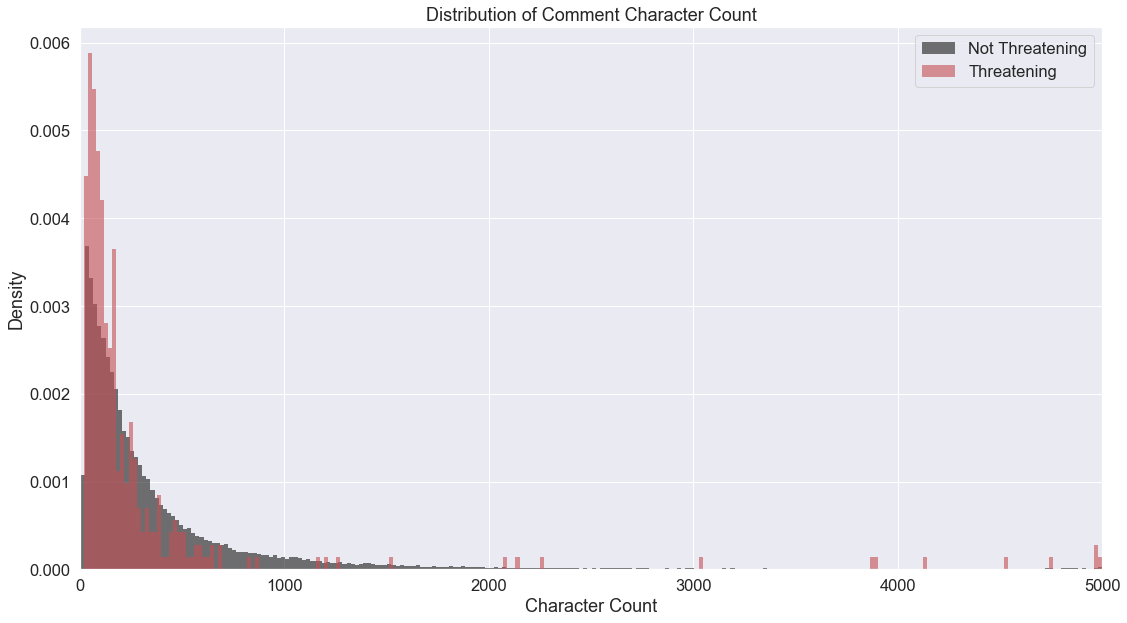

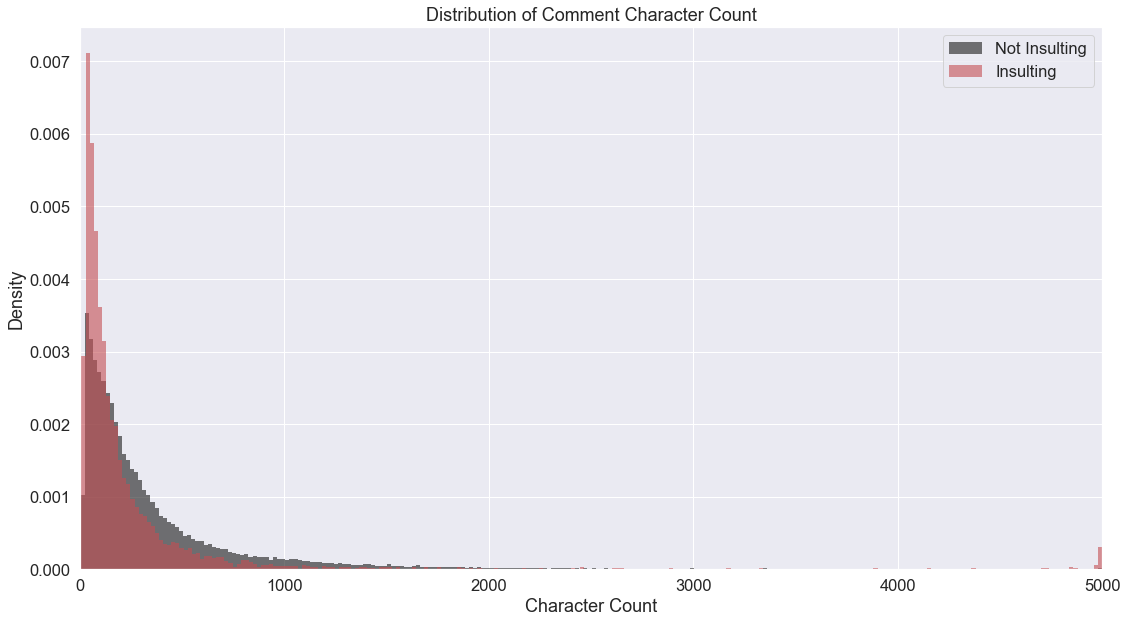

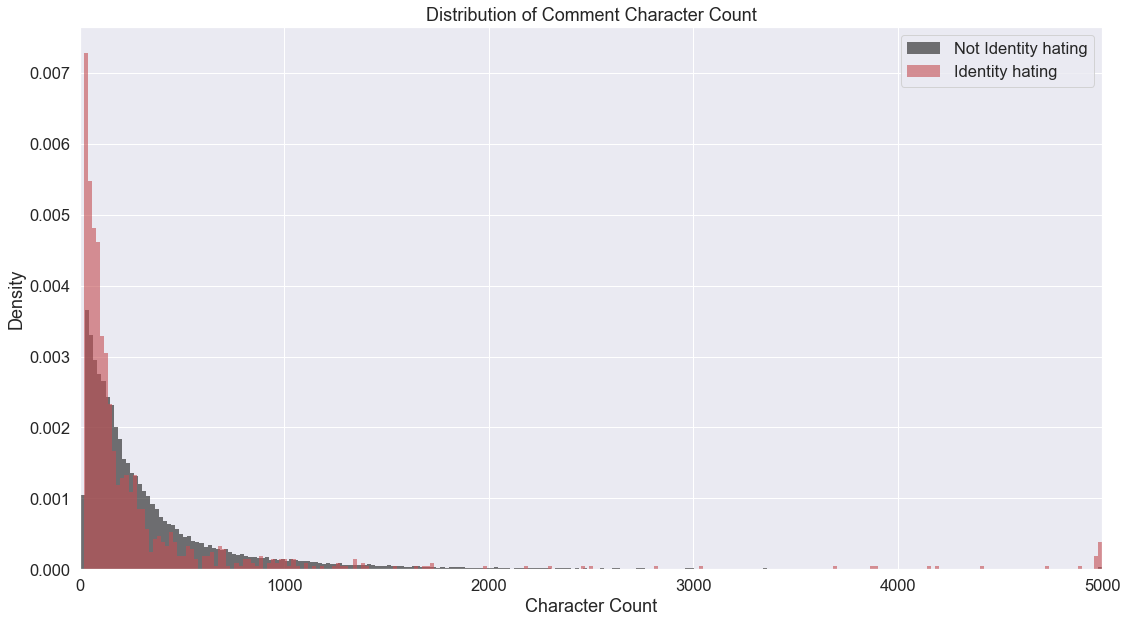

Wall time: 12.7 s


In [7]:
# %%time

# # col_labels = ['count_char', 'count_punctuation',
# #        'count_word', 'punct_percent', 'count_real_word', 'count_unique_word',
# #        'count_stopwords', 'count_words_title', 'count_words_upper',
# #        'mean_word_len', 'word_unique_percent', 'count_sent']
# targets_desc = ['toxic', 'severely toxic', 'obscene', 'threatening', 'insulting', 'identity hating']
# colors = ['#61de2a', '#61de2a', 'r', 'r', 'r', 'r']

# for target, target_desc, color in zip(targets, targets_desc, colors):
#     sns.set(font_scale=1.5)
#     fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
#     ax = sns.distplot(X_trains[target][y_trains[target] == 0].str.len(), bins=250, kde=False, hist_kws={'alpha':0.6, 'label':f'Not {target_desc.capitalize()}', 'linewidth':0}, color='k', norm_hist=True)
#     ax = sns.distplot(X_trains[target][y_trains[target] != 0].str.len(), bins=250, kde=False, hist_kws={'alpha':0.6, 'label':f'{target_desc.capitalize()}', 'linewidth':0}, color=color, norm_hist=True)
#     ax.set_xlim(0, X_trains[target].str.len().max())
#     ax.set_title(f'Distribution of Comment Character Count')
#     ax.set_xlabel(f'Character Count')
#     ax.set_ylabel('Density')
#     ax.legend()
#     # plt.savefig('.png')
#     plt.show()

# Text Vectorization / Feature Engineering

In [9]:
# # cleaning function

# # # removes html tags from text
# # from bs4 import BeautifulSoup
# # def strip_html(text):
# #     soup = BeautifulSoup(text, "html.parser")
# #     return soup.get_text()


# # Define function for removing special characters
# import re
# def remove_special_characters(text):
#     # remove urls
#     # remove wikipedia <>:<> tags
#     # remove alphanumeric words
#     # remove numeric and punctuation except those specified
#     pattern=r"(@^(https?|ftp)://[^\s/$.?#].[^\s]*$@iS|[A-Z]\S*:[A-Z]\S*|([a-z]+[0-9]+|[0-9]+[a-z]+)[a-z0-9]*|[^a-zA-z\.\'\:\-\?\!\s])"
#     text=re.sub(pattern,'',text)
#     # replace punctuation except apostrophes with spaces
#     pattern=r'[^a-zA-z\'\s]'
#     text=re.sub(pattern,' ',text)
#     return text

# import nltk
# nltk.download('wordnet')
# from nltk.stem.wordnet import WordNetLemmatizer

# # lemmatizing the text
# def simple_lemmatizer(text):
#     wn=WordNetLemmatizer()
#     text= ' '.join([wn.lemmatize(word) for word in text.split()])
#     return text

# # remove apostrophe from contractions
# import re
# def strip_contractions(text):
#     pattern=r'[^a-zA-z\s]'
#     text=re.sub(pattern,'',text)
#     return text

# # cleaning the text
# def denoise_text(text):
# #     text = strip_html(text)
#     text = remove_special_characters(text)
#     text = simple_lemmatizer(text)
#     text = strip_contractions(text)
#     return text

# # applies cleaning functions on review's column
# # reviews['review']=reviews['review'].apply(denoise_text)

In [10]:
# train['comment_text'] = train_orig['comment_text'].apply(denoise_text)
# test['comment_text'] = test_orig['comment_text'].apply(denoise_text)

In [62]:
# # top n words describing each topic
# n = 20
# topics = np.array(features)[np.argsort(H, axis=1)[:, -n:][:, ::-1]]

In [57]:
# for topic in topics:
#     print([token for token in topic])

['you', 'fac', 'attacking', 'dickface', 'rationale', 'share', 'donkey', 'abuse', 'bizarre', 'discography', 'glad', 'who', 'ideas', 'get', 'allow', 'thinks', 'whats', 'libtard', 'hunt', 'were']
['them', 'implies', 'freud', 'ask', 'warnings', 'ashamed', 'foolish', 'oh', 'attacked', 'calls', 'obviously', 'whenever', 'wise', 'welcome', 'watchlist', 'iran', 'guitar', 'those', 'oil', 'individual']
['fringe', 'bizarre', 'showed', 'attacking', 'allow', 'yourselfgo', 'votes', 'jeremy', 'chosen', 'bang', 'college', 'doing', 'missed', 'license', '1st', 'daily', 'wigger', 'concern', 'saddam', 'shared']
['pictures', 'smoke', 'decent', 'message', 'hi', 'attack', 'thing', 'pdf', 'racial', 'steps', 'company', 'must', 'blatantly', 'those', 'gayfrozen', 'there', 'banks', 'harm', 'muhammad', 'the_real_stephen_hawkinghttp']
['farted', 'jay', 'bill', 'who', 'mrs', 'jack', 'reader', 'the_real_stephen_hawkinghttp', 'type', 'foolish', 'youre', 'ignorance', 'dickface', 'san', 'biography', 'duplicate', 'animal'

# Modeling

In [116]:
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# text vectorizers
# from sklearn.feature_extraction.text import CountVectorizer # tfidf performs better
from sklearn.feature_extraction.text import TfidfVectorizer

# latent feature generation
from sklearn.decomposition import NMF

# feature scaling
from sklearn.preprocessing import StandardScaler

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# cross-validation
from sklearn.model_selection import StratifiedKFold

# roc curve
import numpy as np
from scipy import interp
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

STANDARDIZE FEATURES!!!
~~Logistic Regression with penalty:none, solver: lbfgs, newton-cg no standardization~~ regularization is better
SGDClassifier with log loss(more efficient with large datasets but worse model performance) and elasticnet / requires standardization <- use faster algorithms to use bigger feature space!!
KNeighborsClassifier / requires standardization (slow on sparse matrix!)
GaussianNaiveBayes on latent topics
MultinomialNaiveBayes on tfidf
ComplementNaiveBayes on unbalanced
RandomForestClassifier
CatBoost
RBF SVM
QDA
(ensemble) StackingClassifier
sklearn.utils.class_weight.compute_sample_weight

try sk automl

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='elasticnet', solver='saga', n_jobs=-1, l1_ratio=0.5)
from sklearn.linear_model import LogisticRegressionCV



In [129]:
from sklearn.metrics import roc_auc_score

In [144]:
X_tr_vec.shape

(22941, 52769)

In [138]:
%%time
vectorizer_accent = CountVectorizer(strip_accents='ascii')
X_tr_vec_accent = vectorizer_accent.fit_transform(X_train)
X_test_vec_accent = vectorizer_accent.transform(X_test)

vectorizer = CountVectorizer()
X_tr_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer_accent.transform(X_test)

clf = MultinomialNB()
clf.fit(X_tr_vec_accent, y_train)
y_pred_accent = clf.predict_proba(X_test_vec_accent)[:, 1]
print(roc_auc_score(y_test, y_pred_accent))

clf.fit(X_tr_vec, y_train)
clf.predict_proba(X_test_vec)
# print(roc_auc_score(y_test, y_pred))


0.9285596387533284


ValueError: dimension mismatch

C:\Users\K\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\K\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\K\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\K\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\K\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

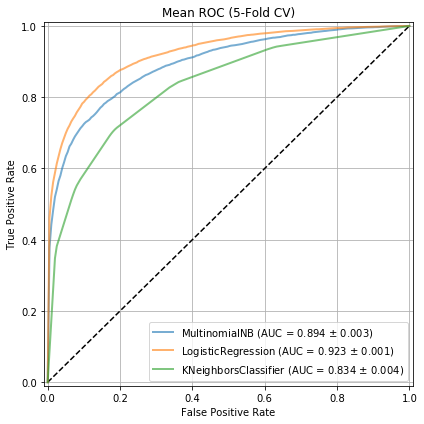

Wall time: 4min 46s


In [126]:
%%time

# vectorizers
# vectorizer = CountVectorizer(max_features=5000) # worse performance than Tfidf
vectorizer = TfidfVectorizer(max_features=5000)

# classifiers
# bnb = BernoulliNB()
mnb = MultinomialNB()
lr = LogisticRegression(penalty='elasticnet', solver='saga', n_jobs=-1, l1_ratio=0.5)
knn = KNeighborsClassifier()
svm = SVC(probability=True)

# classifiers = [mnb, lr, knn, svm]
classifiers = [mnb, lr, knn]
# classifiers = [lr, knn]
# classifiers = [svm]

# latent feature generator
nmf = NMF(n_components=30, random_state=2235)

# scaler
scaler = StandardScaler()

# cv method
cv = StratifiedKFold()

# cv roc curve (for model selection)
fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)

# random guess model
ax.plot([0, 1], [0, 1], 'k--')

# generate fpr by interpolation because of unequal fold sizes
mean_fpr = np.linspace(0, 1, 200)

# loop over each classifier
for classifier in classifiers:
    # tpr, auc for plotting
    tprs = []
    aucs = []
    # cv folds
    for train, test in cv.split(X_train, y_train):
        # vectorize training fold
        X_tr_ct_vec_cv_tr = vectorizer.fit_transform(X_train.values[train])
        X_tr_ct_vec_cv_te = vectorizer.transform(X_train.values[test])
        # shorten vectorized text name
        X_tr = X_tr_ct_vec_cv_tr
        X_te = X_tr_ct_vec_cv_te
        y = y_train.values
        # use latent features to train models that are not Naive Bayes
        if True:
#        if classifier.__class__.__name__[-2:] != 'NB':
            W_tr = nmf.fit_transform(X_tr)
            W_te = nmf.transform(X_te)
            X_tr = W_tr
            X_te = W_te
        # scale features for use in KNN and Regularized Regression
        if classifier.__class__.__name__ in ('LogisticRegression', 'KNeighborsClassifier', 'SVC'):
            X_tr = scaler.fit_transform(X_tr)
            X_te = scaler.transform(X_te)
        # fit classifier and return fpr, tpr, auc
        classifier.fit(X_tr, y[train])
        fpr, tpr, thresholds = roc_curve(y[test], classifier.predict_proba(X_te)[:, 1])
        # interpolate fpr, tpr because fold sizes slightly different
        interp_tpr = interp(mean_fpr, fpr, tpr)
        # append tpr, auc to lists
        tprs.append(interp_tpr)
        aucs.append(auc(fpr, tpr))

    # calculate mean tpr
    mean_tpr = np.mean(tprs, axis=0)
    # calculate statistics for auc from cv
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    # set appropriate end values for tpr
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    # plot roc
    ax.plot(mean_fpr, mean_tpr, label=f'{classifier.__class__.__name__} (AUC = {mean_auc:.3f} $\pm$ {std_auc:.3f})',
            lw=2, alpha=0.6)
# buffer so edge of plot is visible
offset = 0.01
ax.set(xlim=[0-offset, 1+offset], ylim=[0-offset, 1+offset], title="Mean ROC (5-Fold CV)", 
       xlabel='False Positive Rate', ylabel='True Positive Rate')
# legend
ax.legend(loc="lower right")
# resize plot to square
plt.grid('equal')
# save figure (give a name before uncommenting)
# plt.savefig('.png')
# show plot
plt.show()

In [89]:
# train classifiers on full training set and report auc score on test set
for classifier in classifiers:
    # vectorize train and test sets
    X_tr_ct_vec = vectorizer.fit_transform(X_train)
    X_te_ct_vec = vectorizer.transform(X_test)
    # shorten vectorized text name
    X_tr = X_tr_ct_vec
    X_te = X_te_ct_vec
    # use latent features to train models that are not Naive Bayes
    if classifier.__class__.__name__[-2:] != 'NB':
        W_tr = nmf.fit_transform(X_tr)
        W_te = nmf.transform(X_te)
        X_tr = W_tr
        X_te = W_te
    # scale features for use in KNN and Regularized Regression
    if classifier.__class__.__name__ in ('LogisticRegression', 'KNeighborsClassifier', 'SVC'):
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)
    # fit classifier on train set
    classifier.fit(X_tr, y_train)
    # report auc score on test set
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_te)[:, 1])
    print(f'{classifier.__class__.__name__} AUC: {auc(fpr, tpr):.3f}')

LogisticRegression AUC: 0.887


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# parameter space for randomized grid search
n_estimators = [50, 100, 200]
max_features = ['log2', 'sqrt', None]
max_depth = [2, 3, 6]
min_samples_split = [2, 4, 8]
min_samples_leaf = [1, 2, 4]
learning_rate  = [0.1, 0.05, 0.025]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}


# create 20 gbc objects to be tuned and fitted
gbc = GradientBoostingClassifier()
RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, n_iter = 10, scoring='auc', n_jobs = -1, cv = 5, verbose=5)

# tuning and fitting. takes 30 minutes.
gbcs[i-1].fit(Ws[i], reviews['polarity'])

# store avg cv score from best fit models
gbcs_cv_avg_score = [gbc.best_score_ for gbc in gbcs]

# Pipelines

In [119]:
from sklearn.pipeline import make_pipeline

In [ ]:
clf = make_pipeline(TfidfVectorizer(max_features=5000), NMF(n_components=30))

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(TfidfVectorizer(), svm.SVC(kernel='linear'))

scores = cross_validate(clf, data_x, data_y, scoring=['accuracy'], cv=5, return_train_score=False)
print(scores) 

In [82]:
clf = lr
lr_pipe = Pipeline([('lr', lr)])

In [90]:
lr_pipe.set_params(lr__penalty='elasticnet', lr__solver='saga', lr__n_jobs=-1, lr__l1_ratio=0.5).fit(X_tr, y_train)

Pipeline(memory=None,
         steps=[('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.5, max_iter=100,
                                    multi_class='auto', n_jobs=-1,
                                    penalty='elasticnet', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [91]:
lr_pipe.predict(X_te)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [92]:
lr_pipe.score(X_te, y_test)

0.8097293056100432

In [96]:
lr_pipe[0]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

# More Data

In [29]:
jigsaw_unintended_bias_tr = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

jigsaw_unintended_bias_te = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test.csv')

jigsaw_unintended_bias_te_private = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv')

jigsaw_unintended_bias_te_public = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_public_expanded.csv')

attack_annotated_comments = pd.read_csv('data/4054689/attack_annotated_comments.tsv', sep='\t')

attack_annotations = pd.read_csv('data/4054689/attack_annotations.tsv', sep='\t')

attack_worker_demographics = pd.read_csv('data/4054689/attack_worker_demographics.tsv', sep='\t')